In [3]:
# !wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

In [18]:
import numpy

In [19]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [21]:
T_Lan = numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv',delimiter=',',skiprows=4)

In [22]:
print(T_Lan)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [23]:
T_Lan.shape

(1632, 2)

In [26]:
from matplotlib import pyplot
%matplotlib inline

In [27]:
T_Lan[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [34]:
T_Lan[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

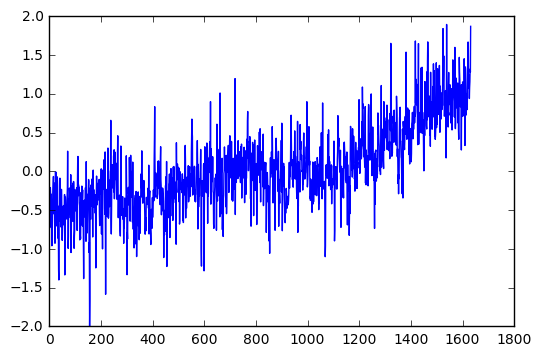

In [38]:
# You can delet the uglu line by adding ';' at the end of the plot command
pyplot.plot(T_Lan[:,1]);

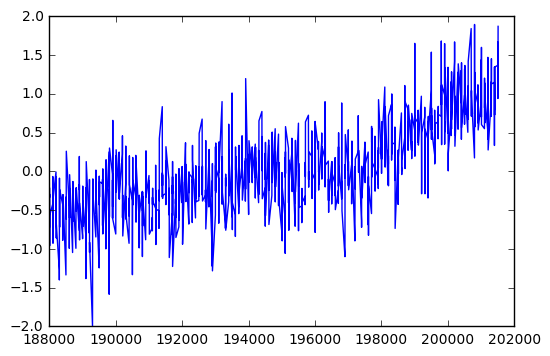

In [40]:
pyplot.plot(T_Lan[:,0],T_Lan[:,1]);

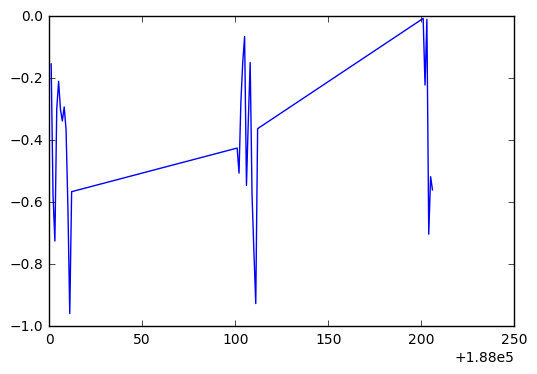

In [41]:
pyplot.plot(T_Lan[0:30,0],T_Lan[0:30,1]);

## Using numpy.arrange() for creating our date array

In [45]:
date = numpy.arange('1880','2016',dtype=('datetime64[M]'))

In [46]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [53]:
dummy = numpy.linspace(1,1632,1632)

print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


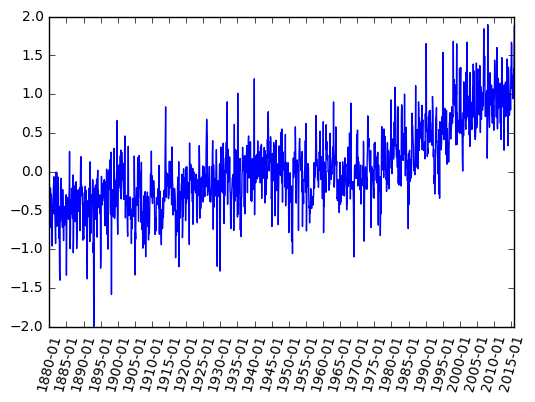

In [57]:
# too many labels in the x axis.
#pyplot.xticks(dummy,date rotation=75);

pyplot.xticks(dummy[::8*10],date[::6*10], rotation=75);

pyplot.plot(dummy,T_Lan[:,1]);